In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler

In [ ]:
df=pd.read_csv("/content/employee.csv");
df

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,NaN,Female,Engineering,Engineer,1,Master,Austin,90000.0
1,2,John Mayes,56.0,Male,Sales,Executive,33,Master,Seattle,195000.0
2,3,Carlos Wille,21.0,Male,Engineering,Intern,1,Bachelor,New York,35000.0
3,4,Michael Bryant,30.0,Male,Finance,Analyst,9,Bachelor,New York,75000.0
4,5,Paula Douglas,25.0,Female,HR,Analyst,2,Master,Seattle,70000.0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Thomas Rossin,51.0,Male,Sales,Executive,28,Master,Austin,185000.0
9996,9997,Christie King,36.0,Female,Sales,Executive,9,PhD,San Francisco,165000.0
9997,9998,Alfred Keller,57.0,Male,Sales,Executive,30,PhD,New York,200000.0
9998,9999,Margaret Gomez,37.0,Female,Engineering,Manager,14,Master,New York,135000.0


df.tail(2)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Employee_ID       10000 non-null  int64  
 1   Name              9996 non-null   object 
 2   Age               9996 non-null   float64
 3   Gender            10000 non-null  object 
 4   Department        10000 non-null  object 
 5   Job_Title         10000 non-null  object 
 6   Experience_Years  10000 non-null  int64  
 7   Education_Level   10000 non-null  object 
 8   Location          10000 non-null  object 
 9   Salary            9997 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,9996.000000,10000.000000,9997.000000
mean,5000.50000,35.455182,12.370900,115393.117935
std,2886.89568,9.998003,9.148951,46067.606780
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [ ]:
df.shape


(10000, 10)

In [ ]:
df.dtypes


,0
Employee_ID,int64
Name,object
Age,float64
Gender,object
Department,object
Job_Title,object
Experience_Years,int64
Education_Level,object
Location,object
Salary,float64


In [ ]:
df.columns

Index(['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title',
       'Experience_Years', 'Education_Level', 'Location', 'Salary'],
      dtype='object')

In [ ]:
print("\nUnique values per column:")
print(df.nunique())



Unique values per column:
Employee_ID         10000
Name                 9864
Age                    40
Gender                  2
Department              6
Job_Title               5
Experience_Years       38
Education_Level         3
Location                5
Salary                 39
dtype: int64


In [ ]:
# detecting null values
df.isnull().sum()
# df.dropna()
# df.fillna(0,inplace=True)
# df.fillna(method='ffill')
# df['rating'].fillna(df['rating'].mean(),inplace=True)

,0
Employee_ID,0
Name,4
Age,4
Gender,0
Department,0
Job_Title,0
Experience_Years,0
Education_Level,0
Location,0
Salary,3


In [ ]:
# Age: Normally distributed → use mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Salary: Skewed → use median
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

# Name: Categorical → use mode (first most frequent)
df['Name'] = df['Name'].fillna(df['Name'].mode()[0])


print(df.isnull().sum())


Employee_ID         0
Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64


In [ ]:
# Removing duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

df = df[~outliers.any(axis=1)]


In [ ]:
df.describe()

,Employee_ID,Age,Experience_Years,Salary
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,35.455182,12.370900,115394.500000
std,2886.89568,9.996003,9.148951,46060.764531
min,1.00000,21.000000,0.000000,25000.000000
25%,2500.75000,27.000000,5.000000,70000.000000
50%,5000.50000,34.000000,10.000000,120000.000000
75%,7500.25000,43.000000,19.000000,150000.000000
max,10000.00000,60.000000,37.000000,215000.000000


In [ ]:
# removing inconsistencies of gender column
df['Gender'] = df['Gender'].str.lower()
df['Gender'] = df['Gender'].replace({'m': 'male','f': 'female'})


In [ ]:
#handling negative values from specific columns
if (df['Experience_Years'] < 0).any():
    df['Experience_Years'] = df['Experience_Years'].abs()


In [ ]:
# data is normally distributed,therefore we are using standard scaler
# if mean>median=positively skewed
# if mean<median=negatively skewed
# mean==median= normal

ss = StandardScaler()
df['Age'] = ss.fit_transform(df[['Age']])

ms = MinMaxScaler()
df['Salary'] = ms.fit_transform(df[['Salary']])

# data is skewed and contains outlier
rs = RobustScaler()
df['Experience'] = rs.fit_transform(df[['Experience_Years']])


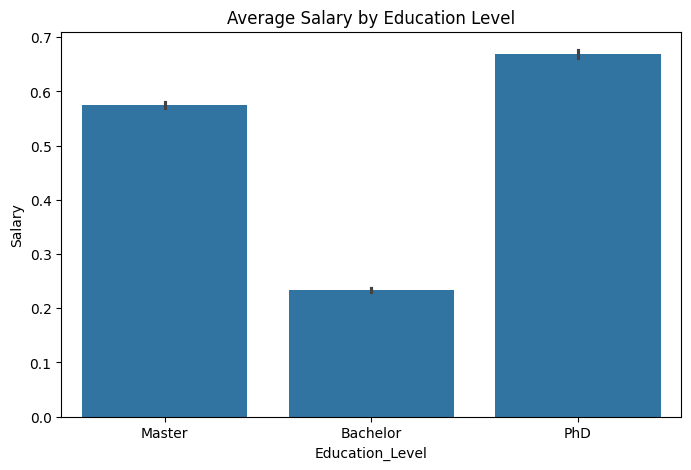

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Education_Level', y='Salary', data=df, estimator='mean')
plt.title('Average Salary by Education Level')
plt.show()


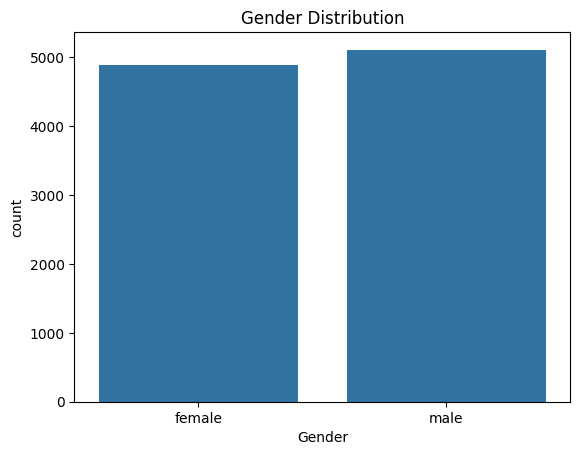

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


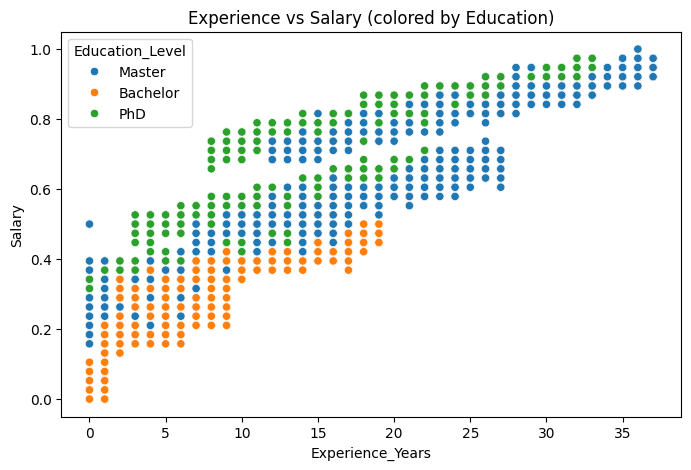

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Experience_Years', y='Salary', hue='Education_Level', data=df)
plt.title('Experience vs Salary (colored by Education)')
plt.show()


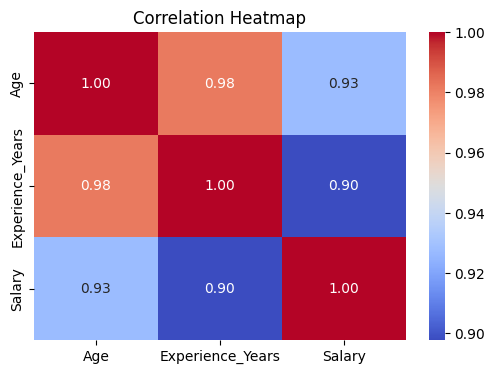

                       Age  Experience_Years    Salary
Age               1.000000          0.981886  0.927664
Experience_Years  0.981886          1.000000  0.897796
Salary            0.927664          0.897796  1.000000


In [ ]:
numeric_cols = ['Age', 'Experience_Years', 'Salary']
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# +1->positive correlation
# -1-> negative correlation
#  0 -> no correlation

print(df[numeric_cols].corr())
